<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b><font color="blue"> Solutions for </font>Grover's Search: Implementation </b></font>
<br>
_prepared by Maksim Dimitrijev and Özlem Salehi_
<br><br>

<a id="task2"></a>

<h3>Task 2</h3>


Let $N=4$. Implement the query phase and check the unitary matrix for the query operator. Note that we are interested in the top-left $4 \times 4$ part of the matrix since the remaining parts are due to the ancilla qubit.

You are given a function $f$ and its corresponding quantum operator $U_f$. First run the following cell to load operator $U_f$. Then you can make queries to $f$ by applying the operator $U_f$ via the following command:

<pre>Uf(qengine,qubit).

In [3]:
%run quantum.py

Now use phase kickback to flip the sign of the marked element:

<ul>
    <li>Set output qubit (qreg[2]) to $\ket{-}$ by applying X and H.</li>
    <li>Apply operator $U_f$
    <li>Set output qubit (qreg[2]) back.</li>
</ul>

(Can you guess the marked element by looking at the unitary matrix?)

<h3>Solution</h3>

(<Figure size 565.814x288 with 1 Axes>, <AxesSubplot:>)
  1.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0
  0.0  0.0  1.0  0.0
  0.0  0.0  0.0 -1.0
(<Figure size 609.014x288 with 1 Axes>, <AxesSubplot:>)


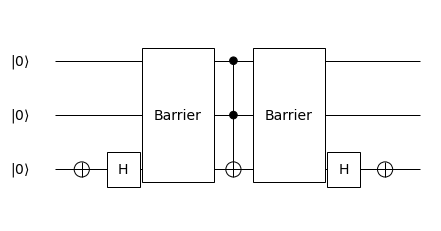

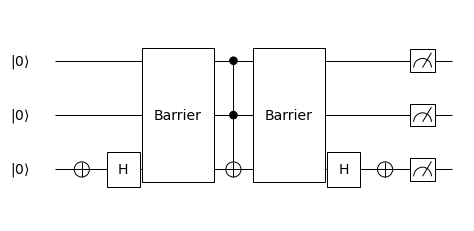

In [5]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, UnitarySimulator
from projectq.setups.default import get_engine_list


qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = UnitarySimulator(), engine_list = [qdrawer]+get_engine_list())

qubit = qengine.allocate_qureg(3)

# Apply X gate
X | qubit[2]
H | qubit[2]

Barrier | qubit

# Call oracle
Uf(qengine,qubit)

Barrier | qubit

# Put ancilla back into state |0>
H | qubit[2]
X | qubit[2]

print(qdrawer.draw())

qengine.flush()
All(Measure) | qubit # Just to remove warnings

circuit_unitary = qengine.backend.unitary


# We are interested in the top-left 4x4 part
for i in range(4):
    s=""
    for j in range(4):
        val = str(round(circuit_unitary[i][j].real,3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
    
print(qdrawer.draw())

<a id="task3"></a>
<h3>Task 3</h3>


Let $N=4$. Implement the inversion operator and check whether you obtain the following matrix:

$\mymatrix{cccc}{-0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & -0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & -0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & -0.5}$.

<h3>Solution</h3>

In [6]:
def inversion(qengine,qubit):
    
    # Step 1
    H | qubit[1]
    H | qubit[0]
    
    # Step 2
    X | qubit[1]
    X | qubit[0]
    
    # Step 3
    C(NOT,2) | (qubit[1],qubit[0],qubit[2])
    
    # Step 4
    X | qubit[1]
    X | qubit[0]
    
    # Step 5
    X | qubit[2]
    
    # Step 6
    H | qubit[1]
    H | qubit[0]
    

Below you can check the matrix of your inversion operator and how the circuit looks like. We are interested in top-left $4 \times 4$ part of the matrix, the remaining parts are because we used ancilla qubit.

(<Figure size 785.39x288 with 1 Axes>, <AxesSubplot:>)
 -0.5  0.5  0.5  0.5
  0.5 -0.5  0.5  0.5
  0.5  0.5 -0.5  0.5
  0.5  0.5  0.5 -0.5


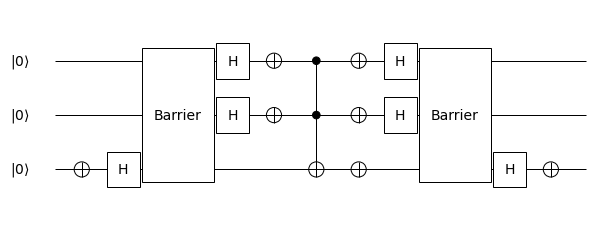

In [8]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, UnitarySimulator
from projectq.setups.default import get_engine_list

qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = UnitarySimulator(), engine_list = [qdrawer]+get_engine_list())

qubit = qengine.allocate_qureg(3)

# Set ancilla
X | qubit[2]
H | qubit[2]

Barrier | qubit

# Call inversion function
inversion(qengine,qubit)

Barrier | qubit

# Put ancilla back into state |0>
H | qubit[2]
X | qubit[2]

print(qdrawer.draw())

qengine.flush()
All(Measure) | qubit # Just to remove warnings

circuit_unitary = qengine.backend.unitary

# We are interested in the top-left 4x4 part
for i in range(4):
    s=""
    for j in range(4):
        val = str(round(circuit_unitary[i][j].real,3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)
    
    


<a id="task4"></a>

<h3>Task 4: Testing Grover's search</h3>

Now we are ready to test our operations and run Grover's search. Suppose that there are 4 elements in the list and try to find the marked element.

You are given the operator $U_f$. First run the following cell to load it. You can access it via <pre>Uf(qengine,qubit).</pre>
qubit[2] is the ancilla qubit and it is shared by the query and the inversion operators.
    
Which state do you observe the most? 

In [9]:
%run quantum.py

<h3>Solution</h3>

110 is observed 5072 times
111 is observed 1216 times
101 is observed 1263 times
011 is observed 1218 times
001 is observed 1231 times
(<Figure size 1029.45x288 with 1 Axes>, <AxesSubplot:>)


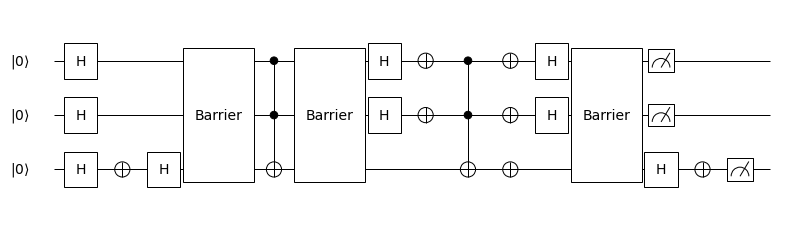

In [10]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list
measurement_dict = {}

for i in range(10000):
    qdrawer = CircuitDrawerMatplotlib()
    qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

    qubit = qengine.allocate_qureg(3)

    # Grover

    # Initial step - equal superposition
    All(H) | qubit

    # Set Ancilla
    X | qubit[2]
    H | qubit[2]

    Barrier | qubit

    # Change the number of iterations
    iterations = 1

    # Grover's iterations
    for i in range(iterations):
        # Query
        Uf(qengine,qubit)
        Barrier | qubit

        # Inversion
        inversion(qengine,qubit)
        Barrier | qubit

    # Put ancilla back into state |0>
    H | qubit[2]
    X | qubit[2]
    
    All(Measure) | qubit
    
    measured_val = "".join([str(int(integer)) for integer in qubit])
    
    if measured_val in measurement_dict.keys():
        measurement_dict[measured_val] += 1
    else:
        measurement_dict[measured_val] = 1
    
for key in measurement_dict:
    print(key, "is observed", measurement_dict.get(key), "times")

print(qdrawer.draw())

<a id="task5"></a>
<h3>Task 5 (Optional, challenging)</h3>

Implement the inversion operation for $n=3$ ($N=8$). This time you will need 5 qubits - 3 for the operation, 1 for ancilla, and one more qubit to implement not gate controlled by three qubits.

In the implementation the ancilla qubit will be qubit 3, while qubits for control are 0, 1 and 2; qubit 4 is used for the multiple control operation. As a result you should obtain the following values in the top-left $8 \times 8$ entries:

$\mymatrix{cccccccc}{-0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75 & 0.25 \\ 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & -0.75}$.

<h3>Solution</h3>

In [47]:
def big_inversion(qengine,qubit):
    
    for i in range(3):
        H | qubit[i]
        X | qubit[i]
        
    Barrier | qubit
    
    C(NOT,2) | (qubit[1],qubit[0],qubit[4])
    C(NOT,2) | (qubit[2],qubit[4],qubit[3])
    C(NOT,2) | (qubit[1],qubit[0],qubit[4])
    
    Barrier | qubit
    
    for i in range(3):
        X | qubit[i]
        H | qubit[i]
        
    X | qubit[3]

Below you can check the matrix of your inversion operator. We are interested in the top-left $8 \times 8$ part of the matrix, the remaining parts are because of additional qubits.

(<Figure size 870.741x432 with 1 Axes>, <AxesSubplot:>)
-0.75 0.25 0.25 0.25  0.0  0.0  0.0  0.0
 0.25-0.75 0.25 0.25  0.0  0.0  0.0  0.0
 0.25 0.25-0.75 0.25  0.0  0.0  0.0  0.0
 0.25 0.25 0.25-0.75  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0-0.25-0.25-0.25-0.25
  0.0  0.0  0.0  0.0-0.25-0.25-0.25-0.25
  0.0  0.0  0.0  0.0-0.25-0.25-0.25-0.25
  0.0  0.0  0.0  0.0-0.25-0.25-0.25-0.25


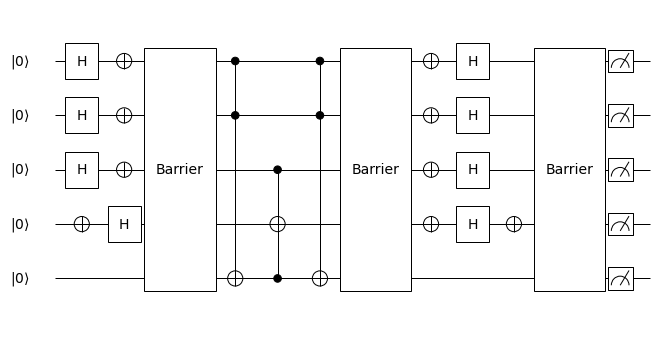

In [48]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, UnitarySimulator
from projectq.setups.default import get_engine_list
measurement_dict = {}

qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = UnitarySimulator(), engine_list = [qdrawer]+get_engine_list())

qubit = qengine.allocate_qureg(5)

# Set Ancilla
X | qubit[3]
H | qubit[3]

# Apply Inversion
big_inversion(qengine,qubit)

# Put ancilla back into state |0>
H | qubit[3]
X | qubit[3]

Barrier | qubit

qengine.flush()
All(Measure)| qubit

print(qdrawer.draw())

circuit_unitary= qengine.backend.unitary

# We are interested in the top-left 8x8 part
for i in range(8):
    s=""
    for j in range(8):
        val = str(round(circuit_unitary[i][j].real,3))
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)


<a id="task6"></a>
<h3>Task 6: Testing Grover's search for 8 elements (Optional, challenging)</h3>

Now we will test Grover's search on 8 elements.

You are given the operator $U_{f_8}$. First run the following cell to load it. You can access it via:

<pre>Uf_8(circuit,qreg)</pre>
    
Which state do you observe the most?

In [ ]:
%run quantum.py

<h3>Solution</h3>

In [27]:
def big_inversion(qengine,qubit):
    
    for i in range(3):
        H | qubit[i]
        X | qubit[i]
    
    C(NOT,2) | (qubit[1],qubit[0],qubit[4])
    C(NOT,2) | (qubit[2],qubit[4],qubit[3])
    C(NOT,2) | (qubit[1],qubit[0],qubit[4])
    
    for i in range(3):
        X | qubit[i]
        H | qubit[i]
        
    X | qubit[3]

010 is observed 76 times
110 is observed 9457 times
011 is observed 76 times
001 is observed 74 times
000 is observed 79 times
100 is observed 87 times
111 is observed 73 times
101 is observed 78 times
(<Figure size 2253.79x432 with 1 Axes>, <AxesSubplot:>)


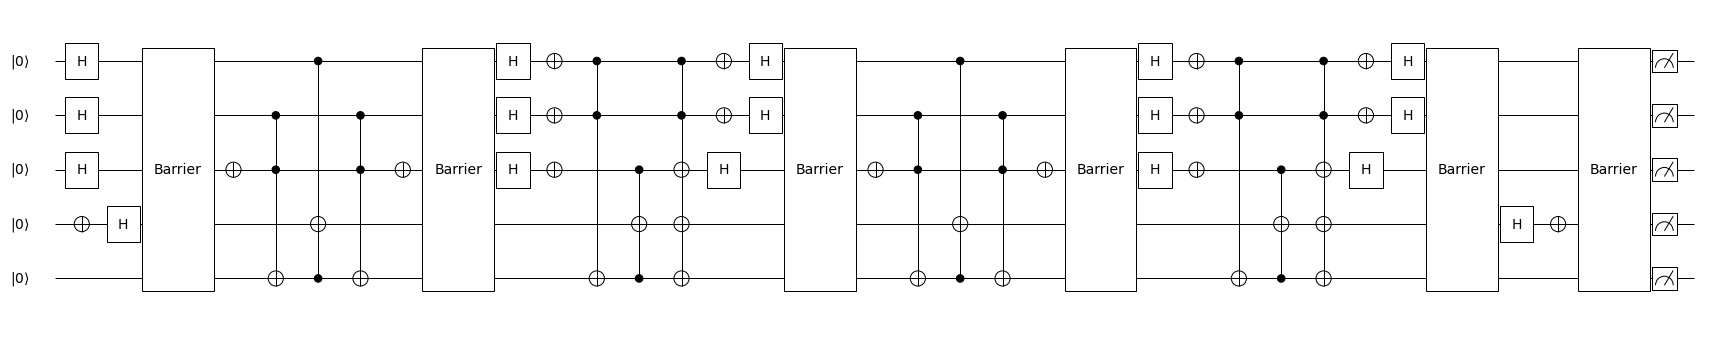

In [28]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list
measurement_dict = {}

for i in range(10000):
    qdrawer = CircuitDrawerMatplotlib()
    qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

    qubit = qengine.allocate_qureg(5)
    
    # Set Ancilla
    X | qubit[3]
    H | qubit[3]
    
    for i in range(3):
        H | qubit[i]
    
    Barrier | qubit
    
    #Try 1,2,6,12 8iterations of Grover
    for i in range(2):
        Uf_8(qengine,qubit)
        Barrier | qubit
        big_inversion(qengine,qubit)
        Barrier | qubit
    
    # Put ancilla back into state |0>
    H | qubit[3]
    X | qubit[3]
    
    Barrier | qubit
    
    All(Measure) | qubit
    
    measured_val = "".join([str(int(integer)) for integer in qubit[:3]])
    
    if measured_val in measurement_dict.keys():
        measurement_dict[measured_val] += 1
    else:
        measurement_dict[measured_val] = 1
    
for key in measurement_dict:
    print(key, "is observed", measurement_dict.get(key), "times")

print(qdrawer.draw())

<a id="task8"></a>

<h3>Task 8</h3>

Implement an oracle function which marks the element 00. Run Grover's search with the oracle you have implemented. 

<h3>Solution</h3>

In [36]:
def oracle_00(qengine,qubit):
    X | qubit[0]
    X | qubit[1]
    C(NOT,2) | (qubit[0],qubit[1],qubit[2])
    X | qubit[0]
    X | qubit[1]

00 is observed 100 times
(<Figure size 1179x288 with 1 Axes>, <AxesSubplot:>)


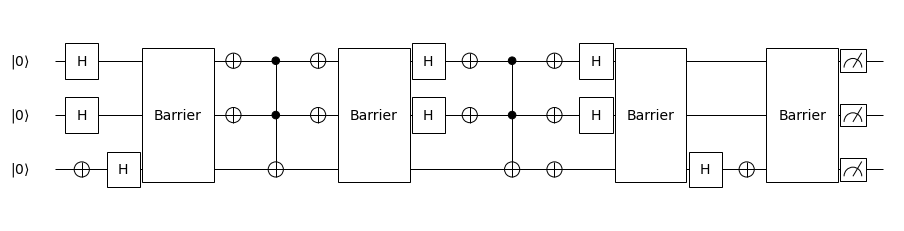

In [37]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list
measurement_dict = {}

for i in range(100):
    qdrawer = CircuitDrawerMatplotlib()
    qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

    qubit = qengine.allocate_qureg(3)
    
    for i in range(2):
        H | qubit[i]
        
    # Set Ancilla
    X | qubit[2]
    H | qubit[2]

    Barrier | qubit
    
    #Try 1,2,6,12 8iterations of Grover
    iterations=1
    
    for i in range(iterations):
        oracle_00(qengine,qubit)
        Barrier | qubit
        inversion(qengine,qubit)
        Barrier | qubit
    
    # Put ancilla back into state |0>
    H | qubit[2]
    X | qubit[2]
    
    Barrier | qubit
    
    All(Measure) | qubit
    
    measured_val = "".join([str(int(integer)) for integer in qubit[:2]])
    
    if measured_val in measurement_dict.keys():
        measurement_dict[measured_val] += 1
    else:
        measurement_dict[measured_val] = 1
    
for key in measurement_dict:
    print(key, "is observed", measurement_dict.get(key), "times")

print(qdrawer.draw())